# **Evaluación 1 - Machine Learning 🖼️🔥**


## **Sección 1**
Genere las siguientes imágenes de manera sintética. \\
**NOTA:** NO USE FUNCIONES DE LIBRERÍAS DE PROCESAMIENTO DE IMÁGENES (CV, PIL, SCIKIT-IMAGE). USE SÓLO OPERACIONES CON ARREGLOS

In [ ]:
# Import some libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt

### **Ejercicio 1 (*C = 1.0* )**

Genere la siguiente imagen [resultado](https://drive.google.com/file/d/1X0V7L6juHHk25VUCu5y4Yl-Y3VfRlAEK/view?usp=drive_link).

True

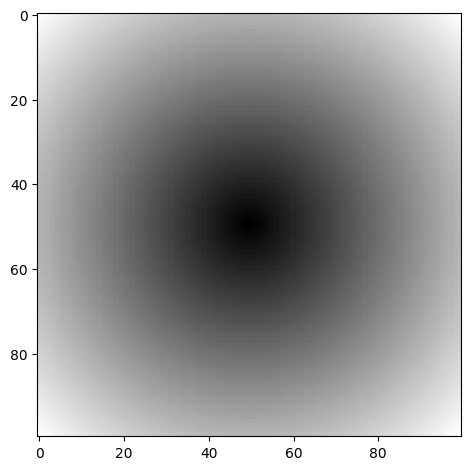

In [ ]:
# Define image dimensions
width = 100
height = 100

# Create an empty array for the image
image = np.zeros((height, width))
image[:,:] = 255

x = np.linspace(0, 100, 100)
y = np.linspace(0, 100, 100)
x, y = np.meshgrid(x, y)

x_0 = 50
y_0 = 50

mask = np.sqrt((x-x_0)**2+(y-y_0)**2)

# Normalize to range [0, 255]
mask = (mask - mask.min()) / (mask.max() - mask.min()) * 255
image = mask.astype(np.uint8)

plt.figure(figsize=(5.5, 5.5))
plt.imshow(image,cmap="gray")

# Save the image using OpenCV
cv2.imwrite("image_stripes.png", image)

### **Ejercicio 2 (*C = 1.0* )**

Genere la siguiente imagen [resultado](https://drive.google.com/file/d/19133rUJ6zjx1okXKZzpzes9fLWK1zpBj/view?usp=drive_link).

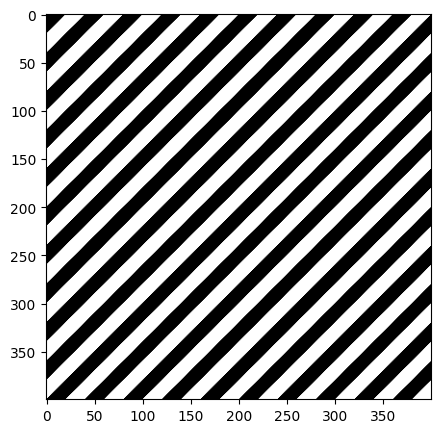

True

In [ ]:
# Define image dimensions
width = 400
height = 400

# Create an empty array for the image
image = np.zeros((height, width))

# Size of diagonal lines
stripe_width = 20

# Create diagonal lines pattern
for i in range(height):
    for j in range(width):
        # Calculate position on the diagonal
        diagonal_position = (i + j) // stripe_width
        # Toggle between black and white
        if diagonal_position % 2 == 0:
            image[i, j] = 0  # Black
        else:
            image[i, j] = 255  # White

# Show image
plt.figure(figsize=(5, 5))
plt.imshow(image, cmap='gray')
plt.axis("on")
plt.show()

# Save the image using OpenCV
cv2.imwrite("image_stripes.png", image)

## **Sección 2**

Genere las siguientes imágenes usando recorridos por píxeles a partir de [lena.jpg](https://drive.google.com/file/d/1gH5sJN__2g7f9ndLhLvTECdOBJIGUbg_/view?usp=sharing) \\
**NOTA:** NO USE FUNCIONES DE LIBRERÍAS DE PROCESAMIENTO DE IMÁGENES (CV, PIL, SKIMAGE). USE SÓLO OPERACIONES CON ARREGLOS

### **Ejercicio 3 (*C = 1.5* )**

Genere la siguiente imagen [resultado](https://drive.google.com/file/d/1yNuP2vWA1thH9kEfxmPV8d66BEMSVioE/view?usp=drive_link) (cara de lena pixelada). \\
**NOTA:** En la salida de la celda puede encontrar el tamaño de la imagen final.

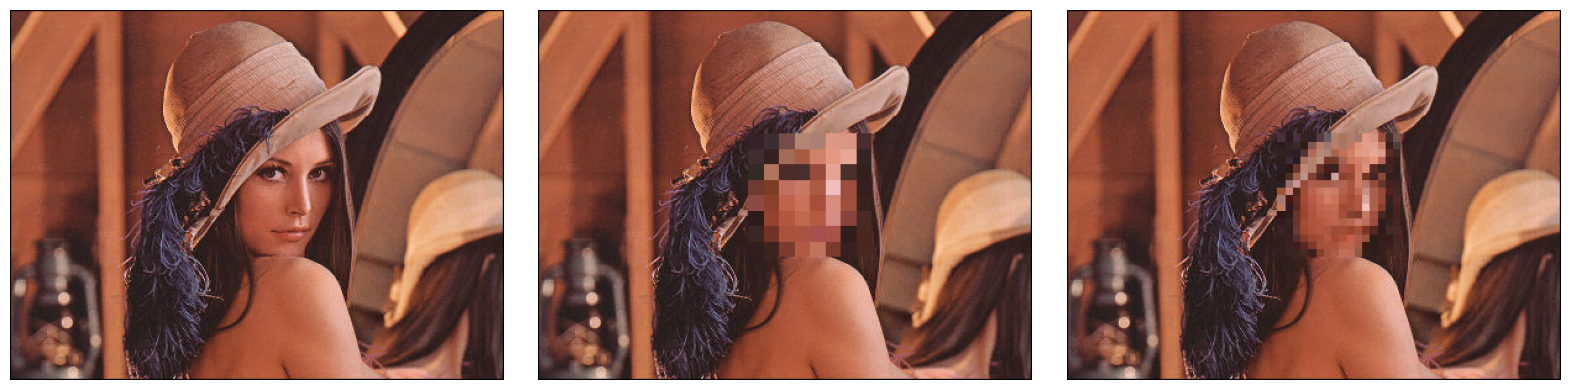

True

In [ ]:
def pixelate_image(roi, pixel_size):
  roi_small = cv2.resize(roi, (roi.shape[1] // pixel_size, roi.shape[0] // pixel_size), interpolation=cv2.INTER_LINEAR)
  roi_pixelated = cv2.resize(roi_small, (roi.shape[1], roi.shape[0]), interpolation=cv2.INTER_NEAREST)
  return roi_pixelated

# Lea la imagen
image = cv2.imread('/content/lena.jpg')

# Convert from BGR to RGB (OpenCV loads as BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Realice aquí todas las operaciones que necesite. Puede añadir cuantas celdas de código requiera

image_medium = image.copy()
image_small = image.copy()

# Región de pixelado con las coordenadas proporcionadas
face_x, face_y = 170, 100
face_width, face_height = 100, 100

# Extraer la región de interés (ROI)
roi = image[face_y:face_y+face_height, face_x:face_x+face_width]


# Reemplazar la región pixelada en la imagen original
image_medium = image.copy()
image_medium[face_y:face_y+face_height, face_x:face_x+face_width] = pixelate_image(roi, 12)

image_small = image.copy()
image_small[face_y:face_y+face_height, face_x:face_x+face_width] = pixelate_image(roi, 6)

# Display the results
plt.figure(figsize=(16, 4))

plt.subplot(1, 3, 1)
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(image_medium)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(image_small)
plt.axis('off')
plt.subplots_adjust(wspace=1)
plt.tight_layout()
plt.show()

# Muestre la imagen y guardela en drive usando opencv (consultar)
cv2.imwrite("/content/image_medium.png", cv2.cvtColor(image_medium, cv2.COLOR_RGB2BGR))
cv2.imwrite("/content/image_small.png", cv2.cvtColor(image_small, cv2.COLOR_RGB2BGR))

### **Ejercicio 4 (*C = 1.5* )**

Genere la siguiente imagen [resultado](https://drive.google.com/file/d/14neChfbS2TnsaX6PBtTQEyi6Ct3m-kpk/view?usp=drive_link).

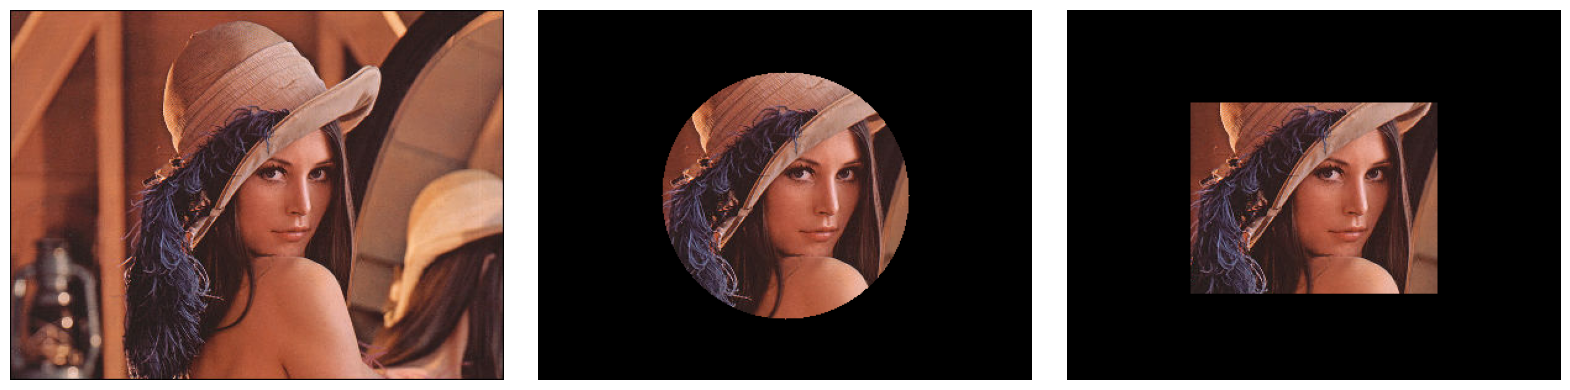

True

In [ ]:
# Lea la imagen
image = cv2.imread('/content/lena.jpg')

# Convert from BGR to RGB (OpenCV loads as BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Realice aquí todas las operaciones que necesite. Puede añadir cuantas celdas de código requiera

#imagen 2
image_circle = image.copy()

# Obtener dimensiones de la imagen
height, width, _ = image_circle.shape

# Crear una máscara circular
mask = np.zeros((height, width), dtype=np.uint8)
center = (width // 2, height // 2)  # Centro de la imagen
radius = min(width, height) // 3     # Radio del círculo

# Aplicar la máscara a la imagen
circular_image = cv2.bitwise_and(image_circle, image_circle, mask=mask)

# Dibujar el círculo en la máscara
cv2.circle(mask, center, radius, 255, -1)

# Aplicar la máscara a la imagen
circular_image = cv2.bitwise_and(image, image, mask=mask)

#Imagen 3

square = image.copy()

# Crear una máscara rectangular
lena_face = image[75:230, 100:300, 0:3]

#remplazar el color de la imagen base
square[:, :, 0:3] = 0

#sobreponer la mascara
square[75:230, 100:300, 0:3] = lena_face

# Display the results
plt.figure(figsize=(16, 4))

plt.subplot(1, 3, 1)
plt.imshow(image)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(circular_image)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(square)
plt.axis('off')
plt.subplots_adjust(wspace=1)
plt.tight_layout()
plt.show()

# Muestre la imagen y guardela en drive usando opencv (consultar)
cv2.imwrite("/content/circular_image.png", cv2.cvtColor(circular_image, cv2.COLOR_RGB2BGR))
cv2.imwrite("/content/square_image.png", cv2.cvtColor(square, cv2.COLOR_RGB2BGR))